In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%config IPCompleter.greedy=True

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
num_train = train.shape[0]
num_test = test.shape[0]

target = train['Survived']
combined = pd.DataFrame(train.drop(['Survived'],1).append(test),  columns=test.columns)
combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
combined.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Young, Miss. Marie Grice",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [7]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
support = 0
for i in range(num_train):
    if train.Embarked.iloc[i] == 'C' and train.Survived.iloc[i] == 1:
        support += 1
support /= num_train
print('support = ', support) 
print('overall survived = ', train.Survived.mean())

support =  0.10437710437710437
overall survived =  0.3838383838383838


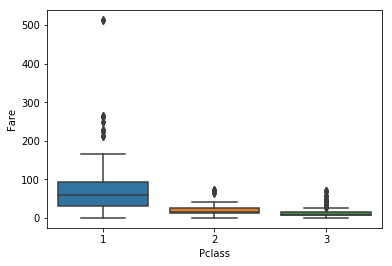

In [15]:
ax = sb.boxplot(x=train['Pclass'], y=train['Fare'])

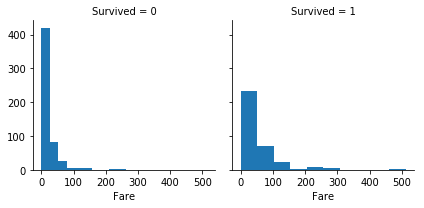

In [16]:
#low_fare = data['Fare'] > 50
g = sb.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

In [17]:
train['FareBins'] = pd.qcut(train['Fare'], 4, labels=np.arange(4))
train[['FareBins','Survived']].groupby(['FareBins'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBins,Survived
3,3,0.581081
2,2,0.454955
1,1,0.303571
0,0,0.197309


In [18]:
train['AgeBins'] = pd.cut(train['Age'], 5, labels=np.arange(5))
train[['AgeBins','Survived']].groupby(['AgeBins'], as_index=False).mean().sort_values(by='AgeBins',ascending=True)

,AgeBins,Survived
0,0,0.550000
1,1,0.369942
2,2,0.404255
3,3,0.434783
4,4,0.090909


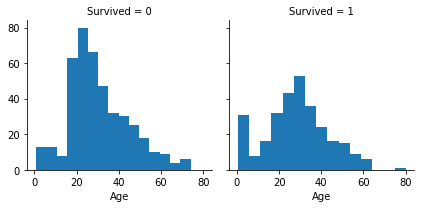

In [19]:
g = sb.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=15)

In [20]:
train[['Fare','Pclass']].corr()

,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


In [21]:
for i in train:
    train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Mme           1
Lady          1
Sir           1
Ms            1
Jonkheer      1
Countess      1
Don           1
Name: Title, dtype: int64

In [22]:
for i in combined:
    combined['Title'] = combined.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combined.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Sir           1
Name: Title, dtype: int64

In [23]:
replace_titles = {
    'Ms':'Miss',
    'Mlle':'Miss',
    'Mme':'Mrs',
    'Capt':'Officer',
    'Col':'Officer',
    'Major':'Officer',
    'Dr':'Officer',
    'Rev':'Officer',
    'Countess':'Nobility',
    'Jonkheer':'Nobility',
    'Sir':'Nobility',
    'Don':'Nobility',
    'Dona':'Nobility',
    'Lady':'Nobility',
    'Miss':'Miss',
    'Mrs':'Mrs',
    'Mr':'Mr',
    'Master':'Master' 
}

train.Title = train.Title.map(replace_titles)
print(train.Title.value_counts())
print(train.Title.isnull().any())
train.Title.fillna('None',inplace=True)
train[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

Mr          517
Miss        185
Mrs         126
Master       40
Officer      18
Nobility      5
Name: Title, dtype: int64
False


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
4,Nobility,0.600000
0,Master,0.575000
5,Officer,0.277778
2,Mr,0.156673


In [24]:
train['Family'] = train.SibSp + train.Parch
print(train.Family.value_counts())
print(train[['Family','Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Family',ascending=True))
#train['FamilyBins'] = pd.cut(train['Family'], 2)
train['FamilyBins'] = train.Family.apply(lambda x: 'alone' if x==0 else ('small family' if x < 4 else 'large family'))
train[['FamilyBins','Survived']].groupby(['FamilyBins'], as_index=False).mean().sort_values(by='Survived',ascending=True)

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64
   Family  Survived
0       0  0.303538
1       1  0.552795
2       2  0.578431
3       3  0.724138
4       4  0.200000
5       5  0.136364
6       6  0.333333
7       7  0.000000
8      10  0.000000


,FamilyBins,Survived
1,large family,0.161290
0,alone,0.303538
2,small family,0.578767


In [25]:
# feature engineering (on both training and test data)

# fill missing entries
combined.Age = combined.Age.fillna(np.mean(combined.Age))
combined.Embarked = combined.Embarked.fillna('S')

# introduce Fare and Age bins
combined['FareBins'] = pd.qcut(combined.Fare, 4, labels=np.arange(4))
combined['AgeBins'] = pd.cut(combined.Age, 5, labels=np.arange(5))

# introduce Title categories
for i in combined:
    combined['Title'] = combined.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combined.Title = combined.Title.map(replace_titles)

# introduce Family categories
combined['Family'] = combined.SibSp + combined.Parch
combined['FamilyBins'] = combined.Family.apply(lambda x: 'alone' if x==0 else ('small family' if x < 4 else 'large family'))

# reduce data to interesting attributes
features1 = ['Pclass','Sex','Age','Fare','Embarked','Title','FamilyBins']
features2 = ['Pclass','Sex','AgeBins','FareBins','Embarked','Title','FamilyBins']
combined1 = combined.filter(features1)
combined2 = combined.filter(features2)

# transform features to numerical categories
le = preprocessing.LabelEncoder()
for c in features1:
    combined1[c] = le.fit_transform(combined1[c])
    #print(list(le.classes_))
for c in features2:
    combined2[c] = le.fit_transform(combined2[c])
    
# encode categorial features as multiple binary features
enc = preprocessing.OneHotEncoder()
combined_binary1 = enc.fit_transform(combined1[features1])
combined_binary2 = enc.fit_transform(combined2[features2])

In [26]:
# make sure that there are no missing values anymore
combined.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Title          False
FareBins        True
AgeBins        False
Family         False
FamilyBins     False
dtype: bool

In [27]:
# split again into train and test set
training_data1 = combined1.iloc[:num_train,:]
test_data1 = combined1.iloc[num_train:,:]
training_data_binary1 = combined_binary1[:num_train,:]
test_data_binary1 = combined_binary1[num_train:,:]

training_data2 = combined2.iloc[:num_train,:]
test_data2 = combined2.iloc[num_train:,:]
training_data_binary2 = combined_binary2[:num_train,:]
test_data_binary2 = combined_binary2[num_train:,:]

In [28]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_rf = RandomForestClassifier(random_state=0)
clf_svm = SVC()
clf_lr = LogisticRegression()
clf_kn = KNeighborsClassifier()

model_list = [clf_dt, clf_rf, clf_svm, clf_lr, clf_kn]

for clf in model_list:
    
    print(clf, "\n")
    
    print('Without Age and Fare Bins: \n')

    # compute model and perform 10-fold cross valdation (using the numerical features)
    scores = cross_val_score(clf, training_data1, target, cv=10)
    print("cross-val scores (numerical features):", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, training_data_binary1, target, cv=10)
    print("cross-val scores (binary features):", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")
    
    print('With Age and Fare Bins: \n')

    # compute model and perform 10-fold cross valdation (using the numerical features)
    scores = cross_val_score(clf, training_data2, target, cv=10)
    print("cross-val scores (numerical features):", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, training_data_binary2, target, cv=10)
    print("cross-val scores (binary features):", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

 Without Age and Fare Bins: 

cross-val scores (numerical features): [0.72222222 0.84444444 0.74157303 0.79775281 0.82022472 0.76404494
 0.84269663 0.7752809  0.80898876 0.80681818]
mean =  0.7924046646237658 , std =  0.03889689876753284 

cross-val scores (binary features): [0.83333333 0.82222222 0.74157303 0.84269663 0.83146067 0.80898876
 0.80898876 0.79775281 0.80898876 0.85227273]
mean =  0.814827772103053 , std =  0.029347364604115706 

With Age and Fare Bins: 

cross-val scores (numerical features): [0.74444444 0.84444444 0.74157303 0.84269663 0.85393258 0.80898876
 0.85393258 0.7752809  0.85393258 0.85227273]
mean =  0.8171498694813302 

In [35]:
# Logistic Regression parameter tuning
# C: small values result in simple (underfitting) models, large values in complex (overfitting) models

C_values = [0.5, 1, 1.5, 2, 2.5]
for C in C_values:
    clf = LogisticRegression(C=C)
    print('C = ',C)
    # compute model and perform 10-fold cross valdation (using the binary features)
    scores = cross_val_score(clf, training_data_binary1, target, cv=10)
    print("cross-val scores (binary features):", scores)
    print("mean = ", np.mean(scores), ", std = ", np.std(scores), "\n")

C =  0.5
cross-val scores (binary features): [0.82222222 0.84444444 0.79775281 0.86516854 0.83146067 0.79775281
 0.85393258 0.78651685 0.85393258 0.85227273]
mean =  0.8305456247871978 , std =  0.026678224591709734 

C =  1
cross-val scores (binary features): [0.83333333 0.83333333 0.80898876 0.84269663 0.83146067 0.80898876
 0.84269663 0.83146067 0.86516854 0.86363636]
mean =  0.8361763704460333 , std =  0.017940450991605465 

C =  1.5
cross-val scores (binary features): [0.83333333 0.83333333 0.82022472 0.83146067 0.84269663 0.83146067
 0.84269663 0.80898876 0.88764045 0.86363636]
mean =  0.8395471569628873 , std =  0.02104345648738756 

C =  2
cross-val scores (binary features): [0.83333333 0.83333333 0.84269663 0.84269663 0.84269663 0.82022472
 0.84269663 0.80898876 0.88764045 0.86363636]
mean =  0.8417943479741232 , std =  0.020656301405480307 

C =  2.5
cross-val scores (binary features): [0.82222222 0.83333333 0.84269663 0.83146067 0.84269663 0.80898876
 0.84269663 0.80898876 0.